## Project Milestone 3

In [20]:
# Some basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.stats import diagnostic
from scipy import stats
import networkx as nx
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.express as px

In [24]:
# load the data 
final_dataset_df_path = 'data/processed_data/success_movies.csv'
ethnicity_sucess_df = pd.read_csv(final_dataset_df_path)

In [ ]:
def reclean_data(dataframe): 
    final_df =dataframe.dropna(subset=['diversity'])
    final_df= final_df[final_df["actor_number"] != 1]
    final_df =final_df.dropna(subset=['Movie_box_office_revenue'])
    print(len(final_df))


In [37]:
reclean_data(ethnicity_sucess_df)

1370


### 1) Introduction

What is the distribution of the diversity score implemented?

In [43]:
# plot histogram of the distribution of diversity scores
fig = px.histogram(ethnicity_sucess_df['diversity'], x="diversity")
fig.show()

In [70]:
# basic statistics on the diversity score 
ethnicity_sucess_df.diversity.describe()

count    1370.000000
mean        0.591002
std         0.491589
min         0.020762
25%         0.176478
50%         0.475281
75%         0.950563
max         2.343992
Name: diversity, dtype: float64

How does the diversity score evolves over time? 

In [71]:
def plot_evolution(dataframe):
    diversity_by_year = dataframe.groupby(dataframe['Movie_release_date']).apply(lambda x: pd.Series({
        'average_diversity': x['diversity'].mean(),
        'std_diversity': x['diversity'].std()
    }))	

    plt.plot(diversity_by_year.index, diversity_by_year.average_diversity)
    plt.title('Average diversity score')
    plt.xlabel('Year')
    plt.ylabel('Diversity Score')
    plt.legend()
    plt.show()

In [72]:
def courbe_tendance(dataframe):
    filtered_df = dataframe[ethnicity_sucess_df['Movie_release_date'].between(1960, 2023)]
    diversity_by_year = filtered_df.groupby(filtered_df['Movie_release_date']).apply(
    lambda x: pd.Series({'average_diversity': x['diversity'].mean()})
)
    plt.plot(diversity_by_year.index, diversity_by_year['average_diversity'], label='Diversity Score')

    z = np.polyfit(diversity_by_year.index, diversity_by_year['average_diversity'], 1)  # Ajustement linéaire
    p = np.poly1d(z)
    plt.plot(diversity_by_year.index, p(diversity_by_year.index), "r--", label='Trend Line')

    plt.xlabel('Year')
    plt.ylabel('Diversity Score')
    plt.title('Average diversity score (1960-2023)')
    plt.legend()
    plt.show()

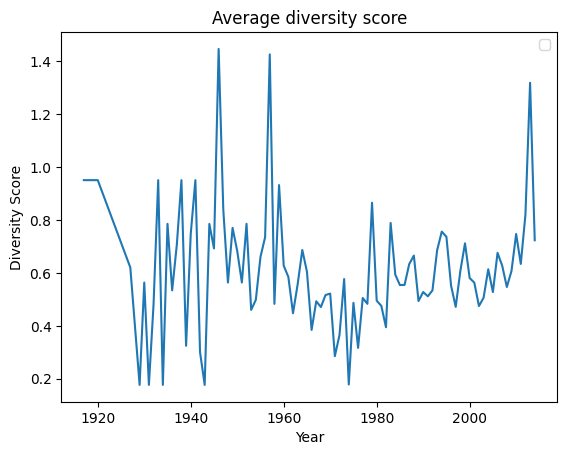

In [73]:
plot_evolution(ethnicity_sucess_df)

In [74]:
fig = px.histogram(ethnicity_sucess_df['Movie_release_date'], x="Movie_release_date")
fig.show()

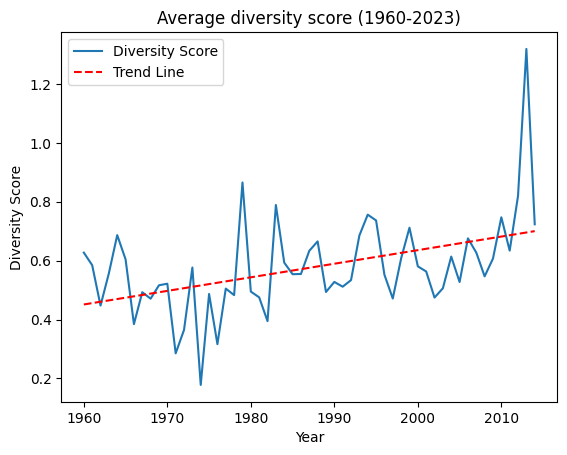

In [75]:
courbe_tendance(ethnicity_sucess_df)

### 2) Statistic analysis 

Is diversity higher in sucessful movies compared to less successful movies ?

In [126]:
def mean_diversity (threshold_revenue, threshold_ratings, dataframe):
    dataframe['Success'] = (dataframe['Ratings'] >threshold_ratings ) | (dataframe['Nomination'] == 'True') | (dataframe['Movie_box_office_revenue'] > threshold_revenue)

    diversite_nomination_1=dataframe.loc[dataframe['Nomination'] == True]['diversity'].mean()
    diversite_box_1=dataframe.loc[dataframe['Movie_box_office_revenue']> threshold_revenue]['diversity'].mean()
    diversite_ratings_1=dataframe.loc[dataframe['Ratings'] > threshold_ratings ]['diversity'].mean()
    diversite_overall_1=dataframe.loc[dataframe['Success'] == True]['diversity'].mean()

    diversite_nomination_0=dataframe.loc[dataframe['Nomination'] == False]['diversity'].mean()
    diversite_box_0=dataframe.loc[dataframe['Movie_box_office_revenue']<= threshold_revenue]['diversity'].mean()
    diversite_ratings_0=dataframe.loc[dataframe['Ratings'] <= threshold_ratings ]['diversity'].mean()
    diversite_overall_0=dataframe.loc[dataframe['Success'] == False]['diversity'].mean()

    print(f"Average diversity for film nominated:{diversite_nomination_1:.4f}")
    print(f"Average diversity for film not nominated:{diversite_nomination_0:.4f}")

    print(f"Average diversity for film with high box revenue:{diversite_box_1:.4f}")
    print(f"Average diversity for film with lower box revenue:{diversite_box_0:.4f}")

    print(f"Average diversity for film with high ratings:{diversite_ratings_1:.4f}")
    print(f"Average diversity for film with lower ratings:{diversite_ratings_0:.4f}")

    print(f"Average diversity for film sucessful :{diversite_overall_1:.4f}")
    print(f"Average diversity for film less sucessful :{diversite_overall_0:.4f}") 
    
    # plot results.     
    categories = ['Nominated', 'Not Nominated']
    diversity_nomination = [diversite_nomination_1, diversite_nomination_0]
    categories_box = ['High Revenue', 'Low Revenue']
    diversity_box = [diversite_box_1, diversite_box_0]
    categories_ratings = ['High Ratings', 'Low Ratings']
    diversity_ratings = [diversite_ratings_1, diversite_ratings_0]
    categories_success = ['Successful', 'Not Successful']
    diversity_success = [diversite_overall_1, diversite_overall_0]
    # Create the figure and subplots
    fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

    # First plot: Nomination
    sns.barplot(x=categories,y=diversity_nomination,ax=axes[0])
    axes[0].set_title('Diversity: Nomination')
    axes[0].set_ylabel('Average Diversity')
    axes[0].set_ylim(0, 1)  # Adjust based on your diversity score range
    axes[0].set_xticks(range(len(categories)))
    axes[0].set_xticklabels(categories, rotation=30)

    # Second plot: Box Office Revenue
    sns.barplot(x=categories_box,y=diversity_box,ax=axes[1])
    axes[1].set_title('Diversity: Box Office Revenue')
    axes[1].set_xticks(range(len(categories_box)))
    axes[1].set_xticklabels(categories_box, rotation=30)

    # Third plot: Ratings
    sns.barplot(x=categories_ratings,y=diversity_ratings,ax=axes[2])
    axes[2].set_title('Diversity: Ratings')
    axes[2].set_xticks(range(len(categories_ratings)))
    axes[2].set_xticklabels(categories_ratings, rotation=30)

    # Fourth plot: Success
    sns.barplot(x=categories_success,y=diversity_success,ax=axes[3])
    axes[3].set_title('Diversity: Success')
    axes[3].set_xticks(range(len(categories_success)))
    axes[3].set_xticklabels(categories_success, rotation=30)

    # Adjust layout
    plt.tight_layout()
    plt.show()

Average diversity for film nominated:0.6051
Average diversity for film not nominated:0.5882
Average diversity for film with high box revenue:0.5760
Average diversity for film with lower box revenue:0.5963
Average diversity for film with high ratings:0.4691
Average diversity for film with lower ratings:0.6037
Average diversity for film sucessful :0.5559
Average diversity for film less sucessful :0.6081


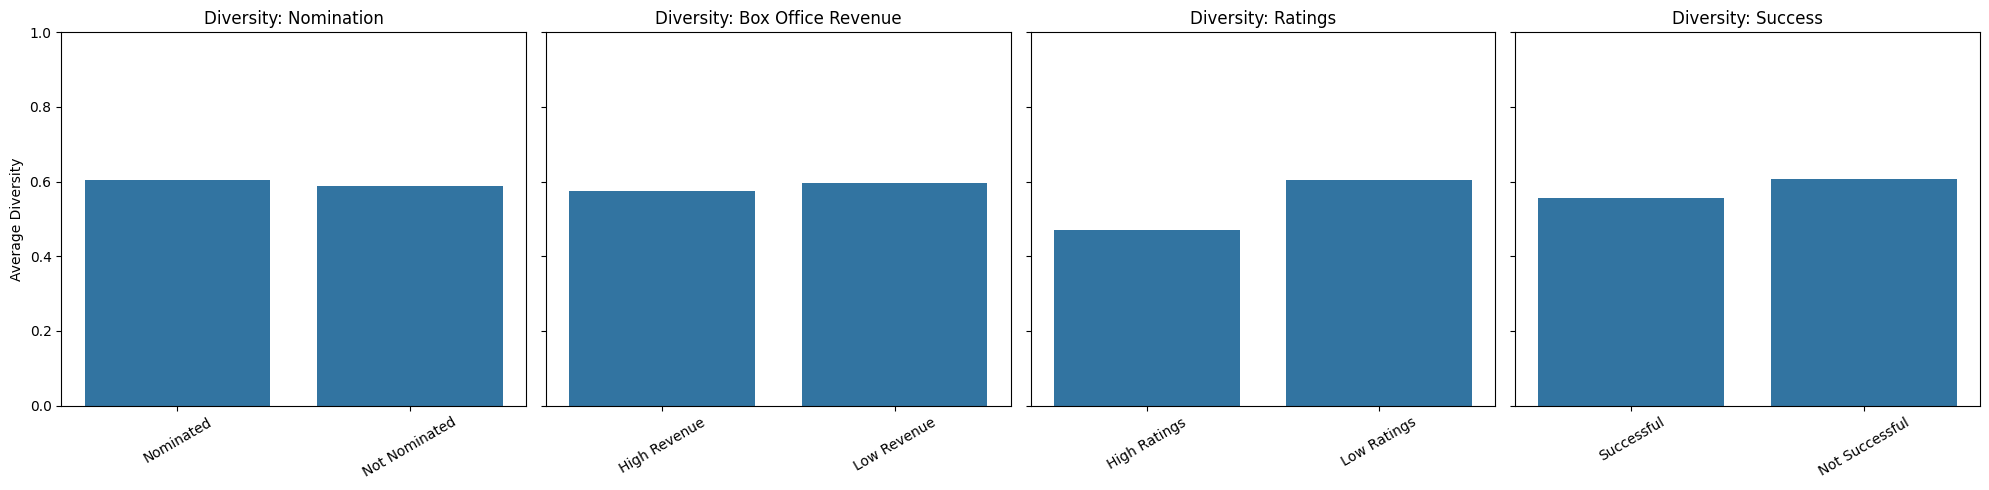

In [127]:
mean_diversity (38119483, 7.5, ethnicity_sucess_df)

The diversity factor seems very slightly higher for film film nominated and slightly lower for films with high box revenue. The diversity factor appears lower for films with high ratings.

Are those differences significant ? Let's do a t-test. 

In [90]:
def get_t_test(threshold_revenue, threshold_ratings,dataframe):
    dataframe['Success'] = (dataframe['Ratings'] >threshold_ratings ) | (dataframe['Nomination'] == 'True') | (dataframe['Movie_box_office_revenue'] > threshold_revenue)
    t_test_sucess=stats.ttest_ind(dataframe.loc[dataframe['Success'] == True]['diversity'], dataframe.loc[dataframe['Success'] == False]['diversity'])
    t_test_nomination=stats.ttest_ind(dataframe.loc[dataframe['Nomination'] == True]['diversity'], dataframe.loc[dataframe['Nomination'] == False]['diversity'])
    t_test_box=stats.ttest_ind(dataframe.loc[dataframe['Movie_box_office_revenue'] > threshold_revenue]['diversity'], dataframe.loc[dataframe['Movie_box_office_revenue'] <= threshold_revenue]['diversity'])
    t_test_ratings=stats.ttest_ind(dataframe.loc[dataframe['Ratings'] > threshold_ratings ]['diversity'], dataframe.loc[dataframe['Ratings'] <= threshold_ratings ]['diversity'])

    print(f"Nomination:{t_test_nomination}")
    print(f"Box revenue:{t_test_box}")
    print(f"Ratings:{t_test_ratings}")
    print(f"Success:{t_test_sucess}")

In [91]:
get_t_test(38119483, 7.5, ethnicity_sucess_df)

Nomination:TtestResult(statistic=np.float64(0.47709061707865286), pvalue=np.float64(0.6333738007468193), df=np.float64(1368.0))
Box revenue:TtestResult(statistic=np.float64(-0.6685528464289106), pvalue=np.float64(0.5038935508242095), df=np.float64(1368.0))
Ratings:TtestResult(statistic=np.float64(-2.9669299252671424), pvalue=np.float64(0.003060126277186654), df=np.float64(1368.0))
Success:TtestResult(statistic=np.float64(-1.8475373210233437), pvalue=np.float64(0.06488508052683443), df=np.float64(1368.0))


The significance threshold of the p value is 0.05. Therefore the difference in nominations, box office revenue, and success overall between successful films and less successful films is not significance. However this difference is significant for ratings. The statistics is -3, meaning that the more diverse the cast is, the lower the review are going to be. 

### 3) How does the threshold on film revenue and ratings influence the results? 

#### a) Ratings 

Average diversity for film nominated:0.6051
Average diversity for film not nominated:0.5882
Average diversity for film with high box revenue:0.5760
Average diversity for film with lower box revenue:0.5963
Average diversity for film with high ratings:0.5136
Average diversity for film with lower ratings:0.6183
Average diversity for film sucessful :0.5563
Average diversity for film less sucessful :0.6201


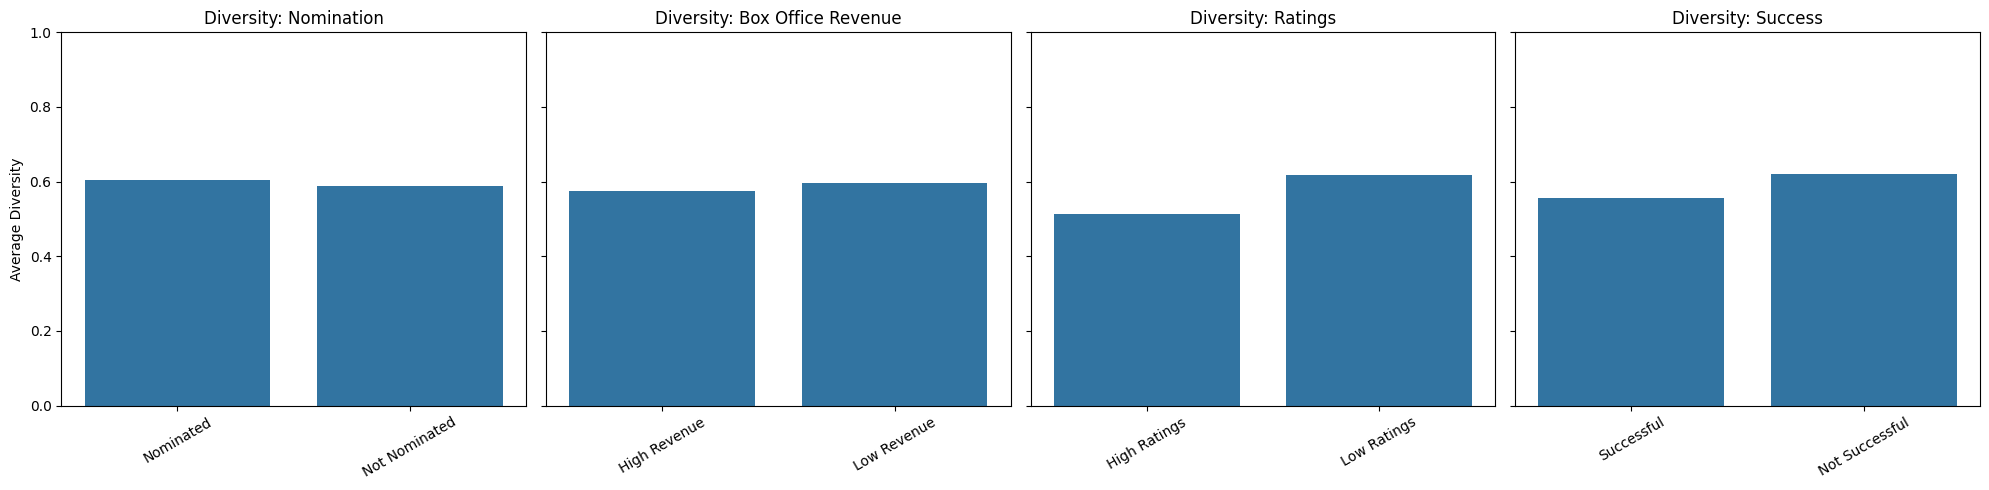

In [128]:
mean_diversity (38119483, 6.9, ethnicity_sucess_df)

Average diversity for film nominated:0.6051
Average diversity for film not nominated:0.5882
Average diversity for film with high box revenue:0.5760
Average diversity for film with lower box revenue:0.5963
Average diversity for film with high ratings:0.4806
Average diversity for film with lower ratings:0.6125
Average diversity for film sucessful :0.5517
Average diversity for film less sucessful :0.6154


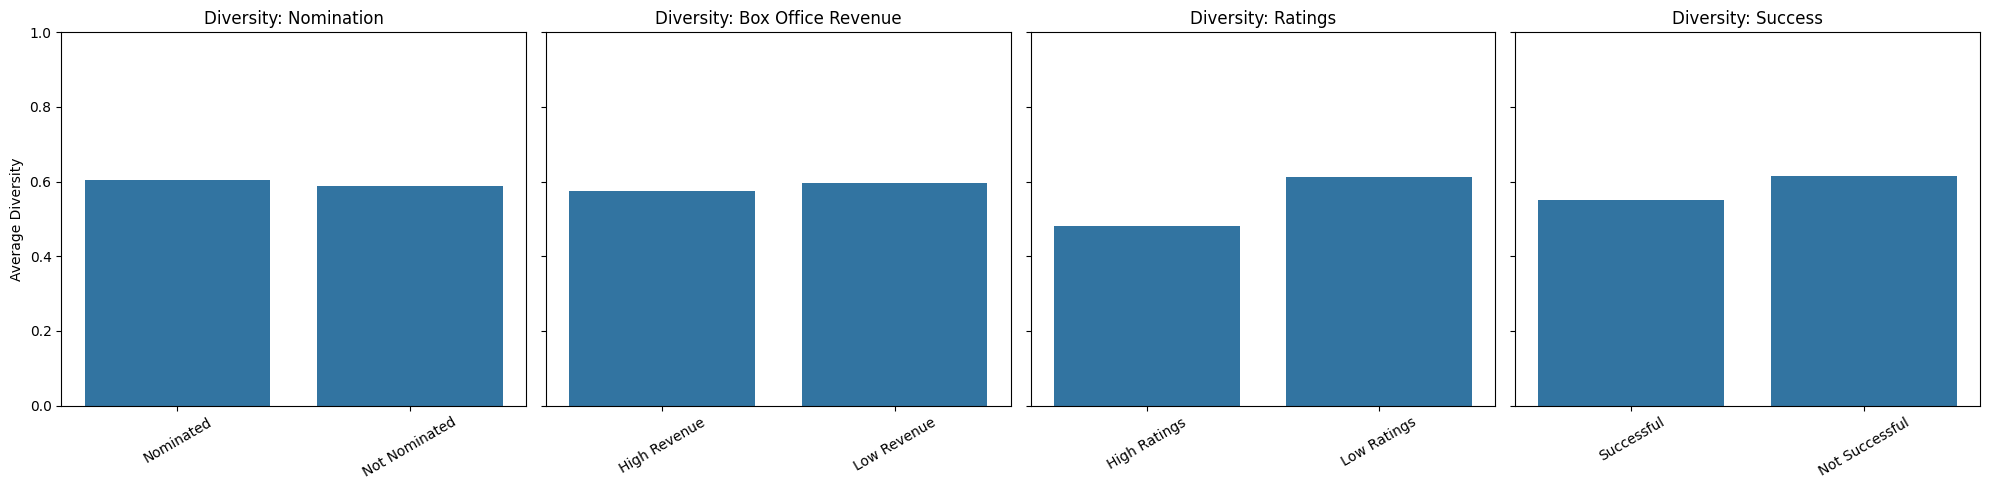

In [129]:
mean_diversity (38119483, 7.2, ethnicity_sucess_df)

Average diversity for film nominated:0.6051
Average diversity for film not nominated:0.5882
Average diversity for film with high box revenue:0.5760
Average diversity for film with lower box revenue:0.5963
Average diversity for film with high ratings:0.4600
Average diversity for film with lower ratings:0.5946
Average diversity for film sucessful :0.5669
Average diversity for film less sucessful :0.6004


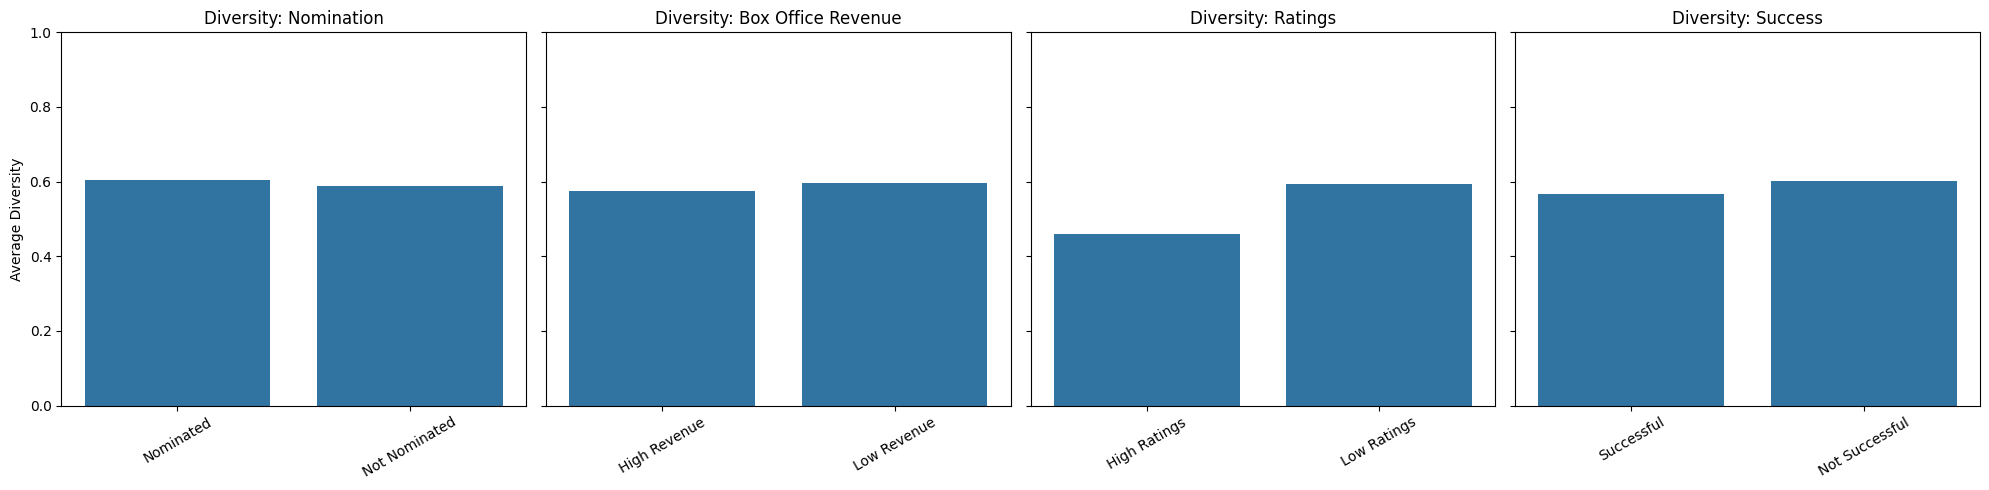

In [130]:
mean_diversity (38119483, 8, ethnicity_sucess_df)

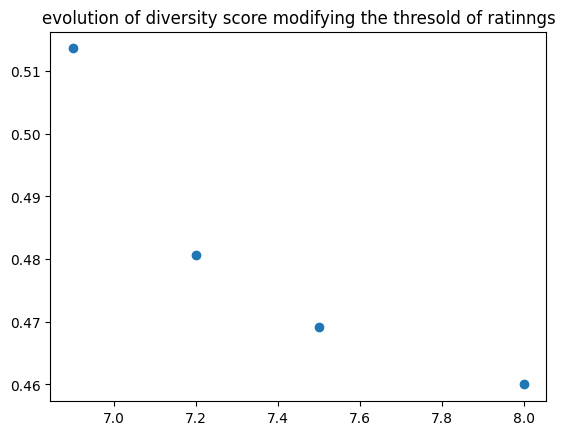

In [38]:
plt.scatter((6.9, 7.2, 7.5, 8),(0.5136,0.4806,0.4691,0.4600))
plt.title('evolution of diversity score modifying the thresold of ratinngs')
plt.show()

#### b) threshold on the box office revenue

Average diversity for film nominated:0.6051
Average diversity for film not nominated:0.5882
Average diversity for film with high box revenue:0.5895
Average diversity for film with lower box revenue:0.5918
Average diversity for film with high ratings:0.4691
Average diversity for film with lower ratings:0.6037
Average diversity for film sucessful :0.5724
Average diversity for film less sucessful :0.6036


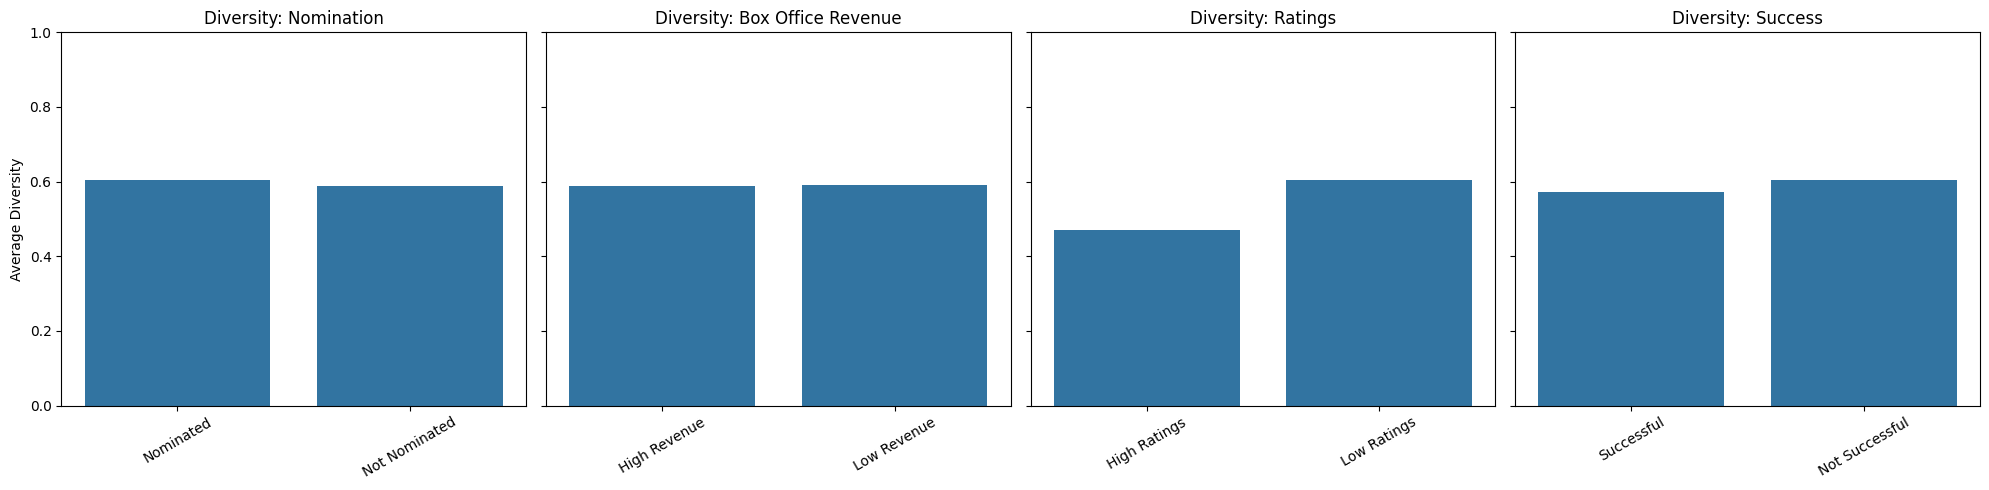

In [131]:
mean_diversity (23963802.0, 7.5, ethnicity_sucess_df)

Average diversity for film nominated:0.6051
Average diversity for film not nominated:0.5882
Average diversity for film with high box revenue:0.6246
Average diversity for film with lower box revenue:0.5906
Average diversity for film with high ratings:0.4691
Average diversity for film with lower ratings:0.6037
Average diversity for film sucessful :0.4863
Average diversity for film less sucessful :0.6034


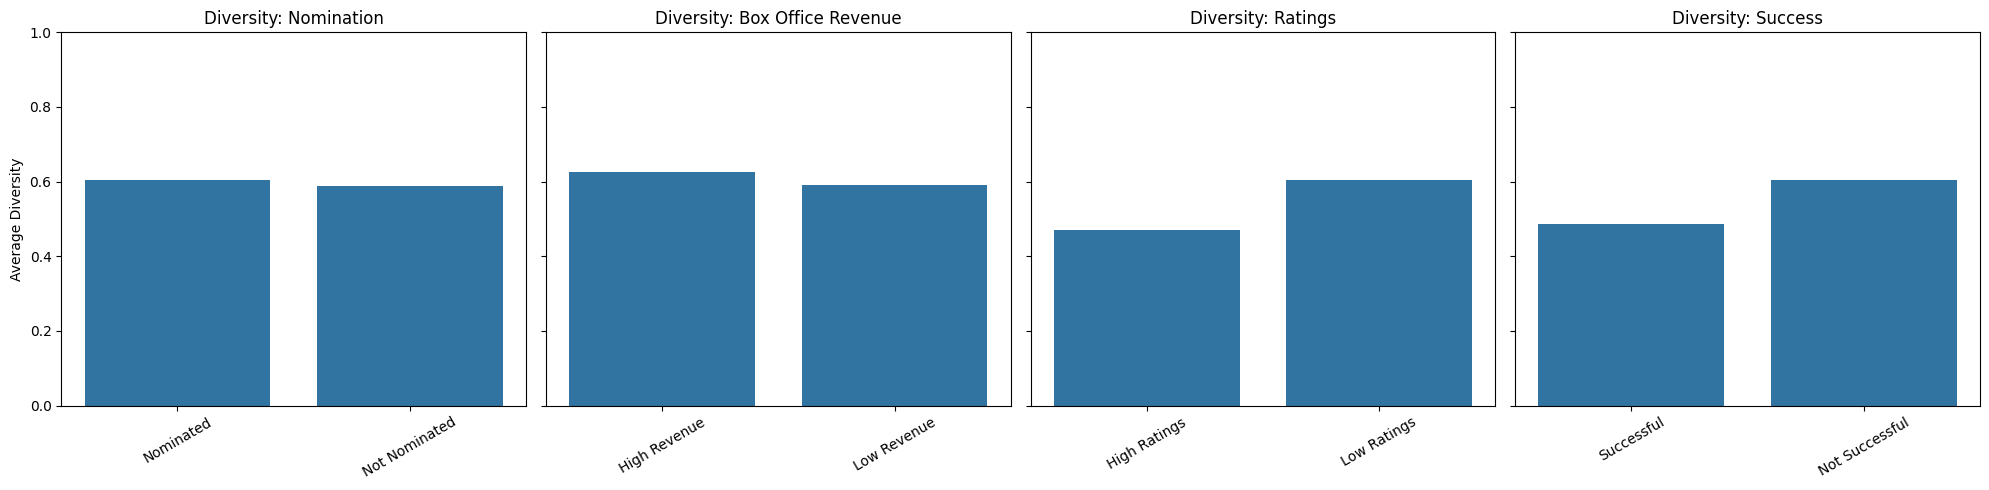

In [132]:
mean_diversity (482083290, 7.5, ethnicity_sucess_df)

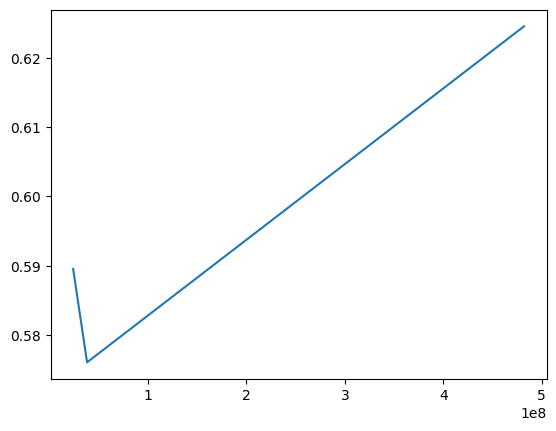

In [34]:
plt.plot((23963802,38119483,482083290), (0.5895, 0.5760 ,0.6246))
plt.show()

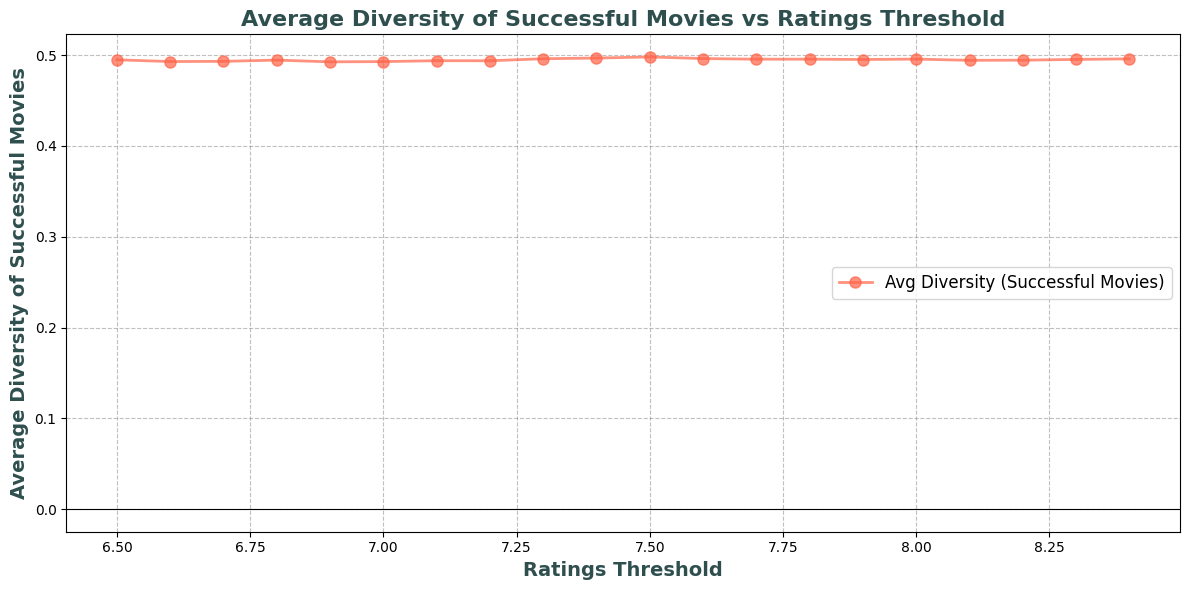

In [ ]:
# Improved plot with more aesthetics
plt.figure(figsize=(12, 6))

# Plot average diversity of successful films with a refined color and style
plt.plot(ratings_thresholds, diversity_successful, 
         label='Avg Diversity (Successful Movies)', 
         marker='o', color='#FF6347', markersize=8, linestyle='-', linewidth=2, alpha=0.7)

# Title with larger font size and bold text
plt.title('Average Diversity of Successful Movies vs Ratings Threshold', fontsize=16, fontweight='bold', color='#2F4F4F')

# Labels with increased font size and clear style
plt.xlabel('Ratings Threshold', fontsize=14, fontweight='bold', color='#2F4F4F')
plt.ylabel('Average Diversity of Successful Movies', fontsize=14, fontweight='bold', color='#2F4F4F')

# Customizing the grid (lighter lines)
plt.grid(True, linestyle='--', color='gray', alpha=0.5)

# Adding a horizontal line for better visual guidance
plt.axhline(y=0, color='black', linewidth=0.8)

# Adding the legend with larger font size
plt.legend(fontsize=12)

# Display the plot
plt.tight_layout()  # Adjust the layout to avoid clipping
plt.show()


## 4) Propensity score matching. 

Many confounders can influence the success of a film. Let's try to isolate the effect of diversity on the sucess of a film. Treatment is diversity. Considered as treated if the diversity score is superior to 0.365256. control if the diversity score is inferior to 0.365256. 

By completing the paired matching, we try to compare movies with similar probability of receiving the treatment, which in our case is an ethnicity score. We used logistic regression to compute the propensity score based on the movie runtime, the year the movie was released, the number of languages present, and the number of countries the film producing the film.

In [98]:
# Import sys to modify the Python path
import sys

# Add the folder containing the module to the Python path
sys.path.insert(1, r'src\data')

# Import the main function from the module
import cleaning_data

character_metadata_path = 'data/raw_data/character.metadata.tsv'
movie_metadata_path = 'data/raw_data/movie.metadata.tsv'
ethnicity_map_path = 'data/raw_data/fb_wiki_mapping.tsv'

# Call the main function
final_cleaned_data = cleaning_data.main(movie_metadata_path, character_metadata_path, ethnicity_map_path)

# Preview the cleaned data
if final_cleaned_data is not None:
    display(final_cleaned_data)

Cleaned data saved to data/preprocess_data/clean_dataset.csv


,Wikipedia_movie_ID,Movie_release_date,Actor_ethnicity,Movie_name,Movie_runtime,Movie_languages,Movie_countries
10,3196793,2000,African Americans,Getting Away with Murder: The JonBenét Ramsey ...,95.0,English Language,United States of America
57,18768079,1938,Jewish people,Fast Company,75.0,English Language,United States of America
59,612710,1999,Italians,New Rose Hotel,92.0,English Language,United States of America
60,612710,1999,German Americans,New Rose Hotel,92.0,English Language,United States of America
83,156558,2001,African Americans,Baby Boy,123.0,English Language,United States of America
...,...,...,...,...,...,...,...
450568,24997872,2010,Malayali,Pokkiri Raja,136.0,Malayalam Language,India
450569,24997872,2010,Indian,Pokkiri Raja,136.0,Malayalam Language,India
450614,30553937,1998,Irish Americans,Confessions of a Sexist Pig,91.0,English Language,United States of America
450626,12476867,2002,Jewish people,Spliced,86.0,English Language,Canada


In [113]:
#ethnicity_sucess_df= ethnicity_sucess_df.drop(['Movie_countries'], axis=1)
ethnicity_sucess_df['Movie_release_date'] = np.float64(ethnicity_sucess_df['Movie_release_date'])
final_cleaned_data['Movie_release_date'] = np.float64(final_cleaned_data['Movie_release_date'])

In [134]:
data=pd.merge(final_cleaned_data,ethnicity_sucess_df,on= ['Wikipedia_movie_ID','Movie_name','Movie_release_date','Actor_ethnicity'], how='inner')
def count_countries(countries_str):
    # Séparer les pays en fonction de la virgule et compter le nombre de pays
    countries = countries_str.split(',')  # Split par la virgule
    return len(countries)

def count_languages(languages_str):
    # Séparer les pays en fonction de la virgule et compter le nombre de pays
    languages = languages_str.split(',')  # Split par la virgule
    return len(languages)

data['Number_of_countries'] = data['Movie_countries'].apply(count_countries)
data['Number_of_languages'] = data['Movie_languages'].apply(count_languages)

In [137]:
data['diversity'] = data['diversity'].apply(lambda x: 1 if x >= 0.365256 else x) # treated
data['diversity'] = data['diversity'].apply(lambda x: 0 if x <= 0.365256 else x) # control

In [138]:
# let's standardize the continuous features
data['Movie_release_date'] = (data['Movie_release_date'] - data['Movie_release_date'].mean())/data['Movie_release_date'].std()
data['Movie_runtime'] = (data['Movie_runtime'] - data['Movie_runtime'].mean())/data['Movie_runtime'].std()
data['Number_of_countries'] = (data['Number_of_countries'] - data['Number_of_countries'].mean())/data['Number_of_countries'].std()
data['Number_of_languages'] = (data['Number_of_languages'] - data['Number_of_languages'].mean())/data['Number_of_languages'].std()

mod = smf.logit(formula= 'diversity ~  Movie_release_date + Movie_runtime + Number_of_countries + Number_of_languages' , data=data)
res = mod.fit()

# Extract the estimated propensity scores
data['Propensity_score'] = res.predict()

print(res.summary())

Optimization terminated successfully.
         Current function value: 0.623466
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              diversity   No. Observations:                 1191
Model:                          Logit   Df Residuals:                     1186
Method:                           MLE   Df Model:                            4
Date:                Tue, 10 Dec 2024   Pseudo R-squ.:                 0.07343
Time:                        11:01:34   Log-Likelihood:                -742.55
converged:                       True   LL-Null:                       -801.39
Covariance Type:            nonrobust   LLR p-value:                 1.662e-24
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.4300      0.062      6.897      0.000       0.308       0.552
Mo

In [139]:
def get_similarity(propensity_score1, propensity_score2):
    '''Calculate similarity for instances with given propensity scores'''
    return 1-np.abs(propensity_score1-propensity_score2)

In [ ]:
# Separate the treatment and control groups
treatment_df = data[data['diversity'] == 1]
control_df = data[data['diversity'] == 0]

# Create an empty undirected graph
G = nx.Graph()

# Loop through all the pairs of instances
for control_id, control_row in control_df.iterrows():
    for treatment_id, treatment_row in treatment_df.iterrows():

        # Calculate the similarity 
        similarity = get_similarity(control_row['Propensity_score'],
                                    treatment_row['Propensity_score'])

        # Add an edge between the two instances weighted by the similarity between them
        G.add_weighted_edges_from([(control_id, treatment_id, similarity)])

# Generate and return the maximum weight matching on the generated graph
matching = nx.max_weight_matching(G)

In [ ]:
matched = [i[0] for i in list(matching)] + [i[1] for i in list(matching)]

In [ ]:
balanced_df_1 = data.iloc[matched]

In [ ]:
treatment_df = balanced_df_1[balanced_df_1['diversity'] == 1]
control_df = balanced_df_1[balanced_df_1['diversity'] == 0]

In [ ]:
balanced_df_1['Success'] = balanced_df_1['Success'].replace({False: 0, True: 1})

/var/folders/w7/t9sglxkj5nz7xv4mxk5dftlh0000gn/T/ipykernel_2884/1946030893.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/var/folders/w7/t9sglxkj5nz7xv4mxk5dftlh0000gn/T/ipykernel_2884/1946030893.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
treatment_df = balanced_df_1[balanced_df_1['diversity'] == 1]
control_df = balanced_df_1[balanced_df_1['diversity'] == 0]

In [ ]:

# Calculate the ATE based on matched pairs. 
y_treat=treatment_df['Success'].sum()
y_control=control_df['Success'].sum()
N=len(matching)
ATE= (1/N)* (y_treat-y_control)
print(f"Average Treatment Effect (ATE) : {ATE}")

Average Treatment Effect (ATE) : -0.057416267942583726
